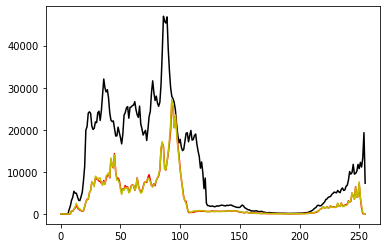

In [1]:
# grayscale conversion effects of filtering images
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=0
#import image and copy in grayscale
image=cv2.cvtColor(cv2.imread('body/box2.jpg'),cv2.COLOR_BGR2RGB)
if debug:
    plt.imshow(image)
    plt.show()
imagegray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
if debug:
    plt.imshow(imagegray,cmap='gray')
    plt.show()
# bilateral filter on original and copy
fltparam=(21,51,51)
image=cv2.bilateralFilter(image,fltparam[0],fltparam[1],fltparam[2])
if debug:
    plt.imshow(image)
    plt.show()
imagegray=cv2.bilateralFilter(imagegray,fltparam[0],fltparam[1],fltparam[2])
if debug:
    plt.imshow(imagegray,cmap='gray')
    plt.show()
#reconversion of gray/conversion of colored filtered
#new=cv2.cvtColor(imagegray,cv.COLOR_GRAY2RGB) #CAN'T GO BACK since channels were merged
#if debug:
#    plt.imshow(new)
#    plt.show()
newgray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
if debug:
    plt.imshow(newgray,cmap='gray')
    plt.show()
#histogram comparison
histng,_ = np.histogram(newgray,256,[0,256])
histg,_ = np.histogram(imagegray,256,[0,256])
hist,_ = np.histogram(image,256,[0,256])
plt.plot(hist,color = 'k')
plt.plot(histg,color = 'r')
plt.plot(histng,color = 'y')
plt.show()

there's a slight difference, more noticiable if the kernel of the filter gets smaller and the action gets bigger
it's also visible how the grayscale conversin modifies the histogram

In [4]:
# channels extraction
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=0
debhist=0
debhsv=0
image=cv2.cvtColor(cv2.imread('body/box4.jpg'),cv2.COLOR_BGR2RGB)
if debug:
    plt.imshow(image)
    plt.show()
#channel split
imager,imageg,imageb = cv2.split(image)
if debug: 
    plt.imshow(imager,cmap='gray')
    plt.show()
    plt.imshow(imageg,cmap='gray')
    plt.show()
    plt.imshow(imageb,cmap='gray')
    plt.show()
#channel histograms
histr,_ = np.histogram(imager,256,[0,256])#may use imager.flatten()
histg,_ = np.histogram(imageg,256,[0,256])
histb,_ = np.histogram(imageb,256,[0,256])
if debhist:
    plt.plot(histr,color = 'r')
    plt.plot(histg,color = 'g')
    plt.plot(histb,color = 'b')
    plt.show()
#mask of different channels

# HSV equivalent of RGB color
#green = np.uint8([[[0,255,0 ]]])
#hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
redlow=(0)
redhigh=(135)
redmask= cv2.bitwise_not(cv2.inRange(imager,redlow,redhigh))#killmaskt
rimage=cv2.bitwise_and(imager,imager,mask=redmask)
greenlow=(0)
greenhigh=(115)
greenmask= cv2.bitwise_not(cv2.inRange(imageg,greenlow,greenhigh))
gimage=cv2.bitwise_and(imageg,imageg,mask=greenmask)
bluelow=(0)
bluehigh=(115)
bluemask= cv2.bitwise_not(cv2.inRange(imageb,bluelow,bluehigh))
bimage=cv2.bitwise_and(imageb,imageb,mask=bluemask)
#channel merging
imagem=cv2.merge((rimage,gimage,bimage))
if debug:
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY),cmap='gray')
    plt.show()
# result using colors for mask in hsv space
if debhsv:
    redlow=cv2.cvtColor(np.uint8([[[0,0,0 ]]]),cv2.COLOR_BGR2HSV)
    redhigh=cv2.cvtColor(np.uint8([[[0,135,0 ]]]),cv2.COLOR_BGR2HSV)
    redmask= cv2.bitwise_not(cv2.inRange(imager,redlow,redhigh))#killmaskt
    rimage=cv2.bitwise_and(imager,imager,mask=redmask)
    greenlow=cv2.cvtColor(np.uint8([[[0,0,0 ]]]),cv2.COLOR_BGR2HSV)
    greenhigh=cv2.cvtColor(np.uint8([[[0,115,0 ]]]),cv2.COLOR_BGR2HSV)
    greenmask= cv2.bitwise_not(cv2.inRange(imageg,greenlow,greenhigh))
    gimage=cv2.bitwise_and(imageg,imageg,mask=greenmask)
    bluelow=cv2.cvtColor(np.uint8([[[0,0,0 ]]]),cv2.COLOR_BGR2HSV)
    bluehigh=cv2.cvtColor(np.uint8([[[0,115,0 ]]]),cv2.COLOR_BGR2HSV)
    bluemask= cv2.bitwise_not(cv2.inRange(imageb,bluelow,bluehigh))
    bimage=cv2.bitwise_and(imageb,imageb,mask=bluemask)
    imagem=cv2.merge((rimage,gimage,bimage))
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY),cmap='gray')
    plt.show()
##color thresholding its still possible also in HSV space, but the range should be changed
#edges of merged and channels


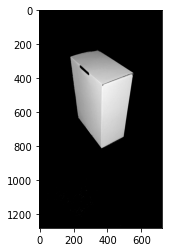

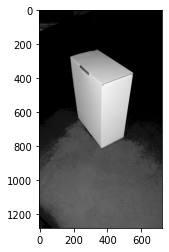

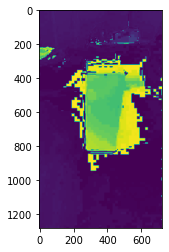

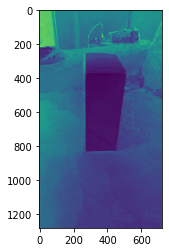

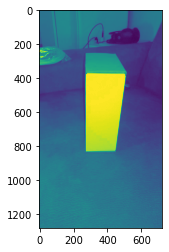

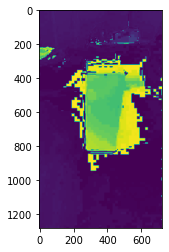

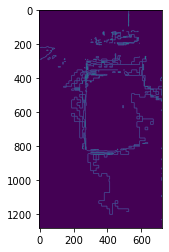

In [35]:
#using hue channel for color based edge detection
#: https://stackoverflow.com/questions/29156091/opencv-edge-border-detection-based-on-color
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=1

image=cv2.cvtColor(cv2.imread('body/box2.jpg'),cv2.COLOR_BGR2HSV)
imgh,imgs,imgv=cv2.split(image)
if debug:
    plt.imshow(imgh)
    plt.show()
    plt.imshow(imgs)
    plt.show()
    plt.imshow(imgv)
    plt.show()
#since hue channel is circular, lowest and highest values coincide, let's shift it
#:https://stackoverflow.com/questions/49697363/shifting-hsv-pixel-values-in-python-using-numpy
#hue€[0-179], so for moving it of teta degrees, shift=theta/2
hueshift=0/2
#imgh=(imgh+ hueshift) % 180 ##iff values: <O | >360°(180)
if debug:
    plt.imshow(imgh)
    plt.show()

#channel thresholding... apparently not usefull without shifting

#edge detector
## h channel not usefull without shifting others
imghedg= cv2.Canny(imgh, 10,500,1)
if debug:
    plt.imshow(imghedg)
    plt.show()
if 0:
    limlow=(50,50,50)
    limhigh=(255,255,)
    mask = cv2.inRange(hsvimage, limlow,limhigh)
    thresimage = cv2.bitwise_and(image,image, mask=mask)
  

In [ ]:
#https://stackoverflow.com/questions/61168140/opencv-removing-the-background-with-a-mask-image
##trasparent channel after the masking